<a href="https://colab.research.google.com/github/archangel2006/Machine-Learning-Models/blob/main/IRIS%20Classification%20(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IRIS SPECIES CLASSIFICATION

Dataset: Iris Dataset from sklearn.datasets library

# Using SVM

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

In [4]:
data = load_iris()

data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [7]:
df['target'] = data.target

In [8]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# DATA VISUALIZATION

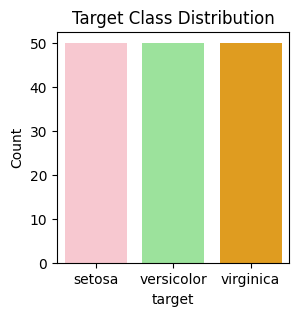

In [29]:
plt.figure(figsize=(3,3))
sns.countplot(x='target',data=df,hue='target',palette=['pink','lightgreen','orange'],legend=False)
plt.title("Target Class Distribution")
plt.xticks(ticks=[0, 1, 2], labels=['setosa', 'versicolor', 'virginica'])
plt.ylabel("Count")
plt.show()


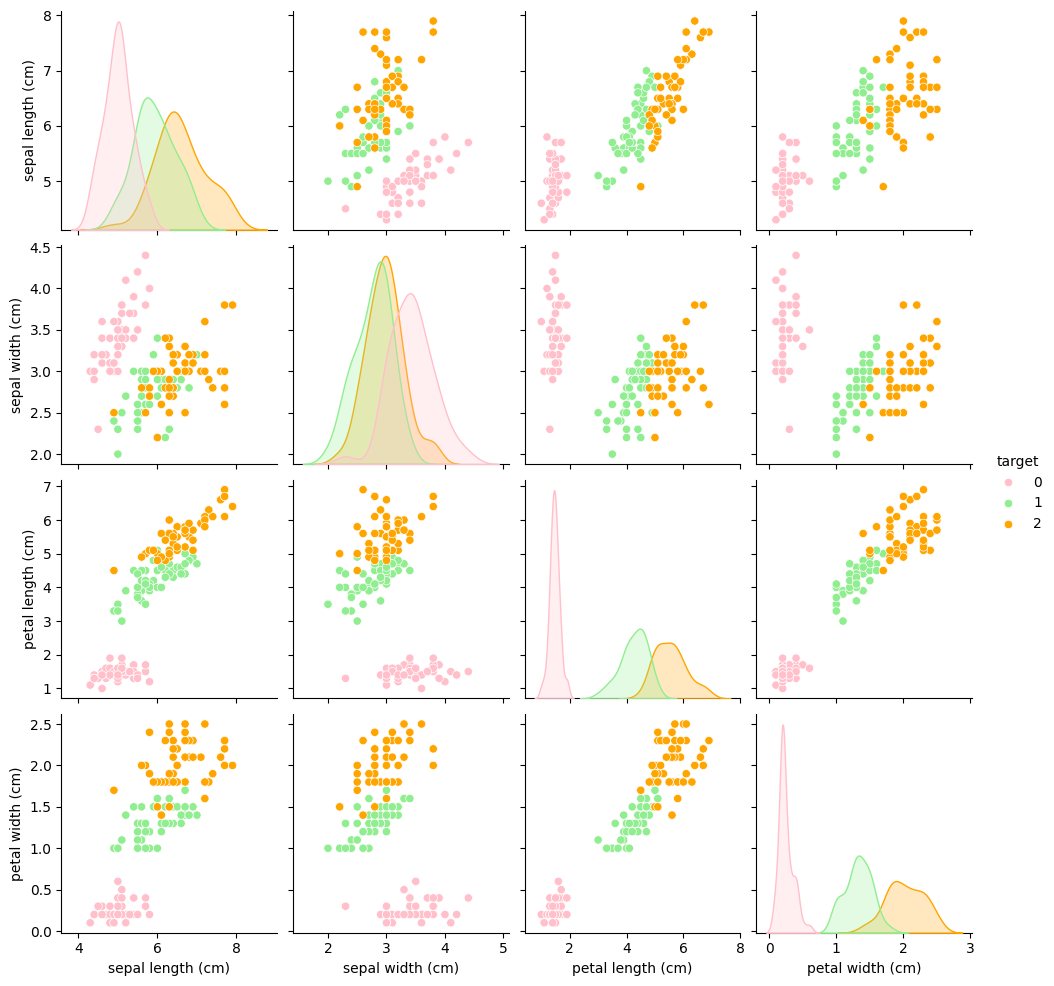

In [19]:
sns.pairplot(data=df, hue='target',palette=['pink','lightgreen','orange'], diag_kind='kde')

# DECIDING TARGET

In [34]:
x = df.drop(['target'],axis=1) # Features
y = df['target'] # Target

# SPLTTING - Train & Test DATA

In [37]:
from sklearn.model_selection import train_test_split

In [36]:
x_test_raw, x_train_raw, y_test, y_train = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

# SCALING

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train_raw)
x_test = scaler.transform(x_test_raw)

# SVM Model

In [41]:
from sklearn.svm import SVC

In [43]:
# define model

svm_model = SVC()

In [44]:
# set up hyperparameter

param_grid = {'C':[0.1,1,10],
              'kernel':['linear','rbf','poly'],
              'gamma':[0.001,0.01,0.1,'scale','auto']}

# GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV

In [47]:
# GridSearchCV with s-fold cross-validation

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 'scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [48]:
# Best hyperparameters

print(f'Best Hyperparameters: {grid_search.best_params_}')

Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


# CROSS VALIDATION

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
# Cross-validated accuracy  of best model

cv_scores = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=5)
print(f'Cross Validation Scores: {cv_scores}')
print(f'Mean cv score: {np.mean(cv_scores)}')

Cross Validation Scores: [1.         0.83333333 1.         1.         0.83333333]
Mean cv score: 0.9333333333333333


# BEST MODEL

In [53]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

# EVALUATE MODEL

In [55]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [64]:
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,y_pred)}")
print(f"Classification Report:\n {classification_report(y_test,y_pred)}")

Accuracy Score: 0.9416666666666667
Confusion Matrix:
 [[39  1  0]
 [ 0 36  4]
 [ 0  2 38]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.92      0.90      0.91        40
           2       0.90      0.95      0.93        40

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



| **Metric**       | **Class 0 (Setosa)** | **Class 1 (Versicolor)** | **Class 2 (Virginica)** | **Overall Interpretation**               |
| ---------------- | -------------------- | ------------------------ | ----------------------- | ---------------------------------------- |
| **Precision**    | 1.00                 | 0.92                     | 0.90                    | Very few false positives overall         |
| **Recall**       | 0.97                 | 0.90                     | 0.95                    | Slight confusion between Class 1 & 2     |
| **F1-Score**     | 0.99                 | 0.91                     | 0.93                    | Well-balanced and consistent performance |
| **Support**      | 40                   | 40                       | 40                      | Perfectly balanced dataset               |
| **Accuracy**     | –                    | –                        | –                       | **94.17% overall** accuracy              |
| **Macro Avg**    | –                    | –                        | –                       | Precision: 0.94, Recall: 0.94, F1: 0.94  |
| **Weighted Avg** | –                    | –                        | –                       | Consistent metrics across all classes    |


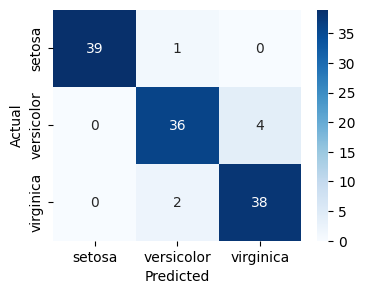

In [61]:
cm = confusion_matrix(y_test,y_pred)

labels=['setosa', 'versicolor', 'virginica']
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

| **Actual \ Predicted**     | **Predicted: 0 (Setosa)** | **Predicted: 1 (Versicolor)** | **Predicted: 2 (Virginica)** | **Interpretation**                      |
| -------------------------- | ------------------------- | ----------------------------- | ---------------------------- | --------------------------------------- |
| **Actual: 0 (Setosa)**     | 39                        | 1                             | 0                            | 1 Setosa misclassified as Versicolor    |
| **Actual: 1 (Versicolor)** | 0                         | 36                            | 4                            | 4 Versicolor misclassified as Virginica |
| **Actual: 2 (Virginica)**  | 0                         | 2                             | 38                           | 2 Virginica misclassified as Versicolor |


# PREDICTION (Sample Input)

In [70]:
# Map for decoding class to species name
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


def predict_flower(features):

    df_input = pd.DataFrame([features], columns=feature_names)

    # Scale the input using the trained scaler
    scaled = scaler.transform(df_input)

    # Predict using the best trained SVM model
    prediction = best_model.predict(scaled)[0]

    # Return species name
    return species_map[prediction]


In [71]:
sample1 = [5.1, 3.5, 1.4, 0.2]  # Likely setosa
sample2 = [6.5, 2.8, 4.6, 1.5]  # Likely versicolor
sample3 = [6.3, 3.3, 6.0, 2.5]  # Likely virginica

print("Sample 1 Prediction:", predict_flower(sample1))
print("Sample 2 Prediction:", predict_flower(sample2))
print("Sample 3 Prediction:", predict_flower(sample3))

Sample 1 Prediction: setosa
Sample 2 Prediction: versicolor
Sample 3 Prediction: virginica
